In [1]:
import pandas as pd
from sklearn import preprocessing
from IPython.display import display, HTML

In [2]:
# getting the dataset
df = pd.read_csv('C:/Users/nayak/Downloads/malware_MultiClass.csv')

In [3]:
# selecting columns specified in readme file
df = df.loc[:, ['classification', 'os', 'usage_counter', 'prio', 'static_prio', 'normal_prio', 'vm_pgoff', 'vm_truncate_count', 'task_size', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm', 'exec_vm', 'reserved_vm', 'nr_ptes', 'nvcsw', 'nivcsw', 'signal_nvcsw']]
df.head()

,classification,os,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw
0,malware,CentOS,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
1,malware,Windows,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
2,malware,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
3,malware,Ubuntu,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
4,malware,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   classification     100000 non-null  object
 1   os                 100000 non-null  object
 2   usage_counter      100000 non-null  int64 
 3   prio               100000 non-null  int64 
 4   static_prio        100000 non-null  int64 
 5   normal_prio        100000 non-null  int64 
 6   vm_pgoff           100000 non-null  int64 
 7   vm_truncate_count  100000 non-null  int64 
 8   task_size          100000 non-null  int64 
 9   map_count          100000 non-null  int64 
 10  hiwater_rss        100000 non-null  int64 
 11  total_vm           100000 non-null  int64 
 12  shared_vm          100000 non-null  int64 
 13  exec_vm            100000 non-null  int64 
 14  reserved_vm        100000 non-null  int64 
 15  nr_ptes            100000 non-null  int64 
 16  nvcsw              10

In [5]:
df.isna().sum()

classification       0
os                   0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
vm_pgoff             0
vm_truncate_count    0
task_size            0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
nvcsw                0
nivcsw               0
signal_nvcsw         0
dtype: int64

In [6]:
y = df['classification'] # define label as nominal values
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y) # encode nominal labels to integers
df['classification'] = y_encoded

In [7]:
df['os'].unique()

array(['CentOS', 'Windows', 'Mac', 'Ubuntu', 'Debian'], dtype=object)

In [8]:
df_num=df.copy(deep=True) 
# create new binary columns
df_dummies=pd.get_dummies(df_num['os'])
df_dummies = df_dummies.astype(int)
# add them to dataframe
df_num=df_num.join(df_dummies)
# drop original columns
df_num.drop('os', axis=1, inplace=True)

In [9]:
df_num.head()

,classification,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,...,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw,CentOS,Debian,Mac,Ubuntu,Windows
0,1,0,3069378560,14274,0,0,13173,0,6850,0,...,210,0,341974,0,0,1,0,0,0,0
1,1,0,3069378560,14274,0,0,13173,0,6850,0,...,210,0,341974,0,0,0,0,0,0,1
2,1,0,3069378560,14274,0,0,13173,0,6850,0,...,210,0,341974,0,0,0,0,1,0,0
3,1,0,3069378560,14274,0,0,13173,0,6850,0,...,210,0,341974,0,0,0,0,0,1,0
4,1,0,3069378560,14274,0,0,13173,0,6850,0,...,210,0,341974,0,0,0,0,1,0,0


In [10]:
# dropping one column to make n-1 dummy variable
df_num = df_num.drop('CentOS', axis= 1)

In [11]:
df_num.head()

,classification,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,...,exec_vm,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw,Debian,Mac,Ubuntu,Windows
0,1,0,3069378560,14274,0,0,13173,0,6850,0,...,124,210,0,341974,0,0,0,0,0,0
1,1,0,3069378560,14274,0,0,13173,0,6850,0,...,124,210,0,341974,0,0,0,0,0,1
2,1,0,3069378560,14274,0,0,13173,0,6850,0,...,124,210,0,341974,0,0,0,1,0,0
3,1,0,3069378560,14274,0,0,13173,0,6850,0,...,124,210,0,341974,0,0,0,0,1,0
4,1,0,3069378560,14274,0,0,13173,0,6850,0,...,124,210,0,341974,0,0,0,1,0,0


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.utils import shuffle

In [13]:
y = df_num['classification']
x = df_num.drop('classification', axis=1)

# trying hold out evaluation first
# splitting into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [14]:
# decision tree 
clf=DecisionTreeClassifier(criterion='entropy', ccp_alpha = 0.1)
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

y_pred_proba = clf.predict_proba(x_test)
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred, average='macro')
recall=recall_score(y_test, y_pred, average='macro')
auc_value = roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr')
print('By hold-out evaluation: accuracy = ',accuracy, ', precison = ', precision, ', recall = ', recall, ', auc = ', auc_value)

By hold-out evaluation: accuracy =  0.9146 , precison =  0.6114685905639086 , recall =  0.6112558543469495 , auc =  0.8264159910641166


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import warnings
warnings.filterwarnings('ignore')

# using cross validation and decision tree 
clf=DecisionTreeClassifier(criterion='log_loss', max_depth=4, 
                        max_leaf_nodes = 5, ccp_alpha = 0.0,
                        min_samples_split=2,
                        min_impurity_decrease=0.02)


precision = make_scorer(precision_score, average='macro')
recall = make_scorer(recall_score, average='macro')
auc = make_scorer(roc_auc_score, average='macro', multi_class='ovr', needs_proba=True)

x, y = shuffle(x, y)
accuracy_val=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
precision_val=cross_val_score(clf, x, y, cv=5, scoring=precision).mean()
recall_val=cross_val_score(clf, x, y, cv=5, scoring=recall).mean()
auc_val=cross_val_score(clf, x, y, cv=5, scoring=auc).mean()
print('By N-fold Cross Validation: accuracy = ',accuracy_val, ', precison = ', precision_val, ', recall = ', recall_val, ', auc = ', auc_val)

By N-fold Cross Validation: accuracy =  0.9187000000000001 , precison =  0.6146990469864188 , recall =  0.614131374685531 , auc =  0.8540065076284413


In [16]:
# using cross validation and decision tree 
clf=DecisionTreeClassifier(criterion='log_loss', max_depth=4, 
                        max_leaf_nodes = 5, ccp_alpha = 0.0,
                        min_samples_split=2,
                        min_impurity_decrease=0.02)


precision = make_scorer(precision_score, average='macro')
recall = make_scorer(recall_score, average='macro')
auc = make_scorer(roc_auc_score, average='macro', multi_class='ovr', needs_proba=True)

x, y = shuffle(x, y)
accuracy_val=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
precision_val=cross_val_score(clf, x, y, cv=5, scoring=precision).mean()
recall_val=cross_val_score(clf, x, y, cv=5, scoring=recall).mean()
auc_val=cross_val_score(clf, x, y, cv=5, scoring=auc).mean()
print('By N-fold Cross Validation: accuracy = ',accuracy_val, ', precison = ', precision_val, ', recall = ', recall_val, ', auc = ', auc_val)

By N-fold Cross Validation: accuracy =  0.9171800000000001 , precison =  0.6133123473226396 , recall =  0.6131129056634277 , auc =  0.846134659257982


In [17]:
# trying different parameters
# criteria is gini
clf=DecisionTreeClassifier(criterion='gini', max_depth=4, 
                        max_leaf_nodes = 5, ccp_alpha = 0.0,)


precision = make_scorer(precision_score, average='macro')
recall = make_scorer(recall_score, average='macro')
auc = make_scorer(roc_auc_score, average='macro', multi_class='ovr', needs_proba=True)

x, y = shuffle(x, y)
accuracy_val=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
precision_val=cross_val_score(clf, x, y, cv=5, scoring=precision).mean()
recall_val=cross_val_score(clf, x, y, cv=5, scoring=recall).mean()
auc_val=cross_val_score(clf, x, y, cv=5, scoring=auc).mean()
print('By N-fold Cross Validation: accuracy = ',accuracy_val, ', precison = ', precision_val, ', recall = ', recall_val, ', auc = ', auc_val)

By N-fold Cross Validation: accuracy =  0.9298 , precison =  0.6204314390177387 , recall =  0.621549138696251 , auc =  0.8407091821691498


In [18]:
# trying different parameters
# using splitter as random and criteria entropy
clf=DecisionTreeClassifier(criterion='entropy', max_depth=10, splitter='random',
                        max_leaf_nodes = 5, ccp_alpha = 0.0,)


precision = make_scorer(precision_score, average='macro')
recall = make_scorer(recall_score, average='macro')
auc = make_scorer(roc_auc_score, average='macro', multi_class='ovr', needs_proba=True)

x, y = shuffle(x, y)
accuracy_val=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
precision_val=cross_val_score(clf, x, y, cv=5, scoring=precision).mean()
recall_val=cross_val_score(clf, x, y, cv=5, scoring=recall).mean()
auc_val=cross_val_score(clf, x, y, cv=5, scoring=auc).mean()
print('By N-fold Cross Validation: accuracy = ',accuracy_val, ', precison = ', precision_val, ', recall = ', recall_val, ', auc = ', auc_val)

By N-fold Cross Validation: accuracy =  0.86442 , precison =  0.5560519987345076 , recall =  0.5408610082586474 , auc =  0.809245927954519


In [19]:
# trying different parameters
# using splitter as random and criteria log loss
clf=DecisionTreeClassifier(criterion='log_loss', max_depth=10, splitter='random',
                        max_leaf_nodes = 5, ccp_alpha = 0.0,)


precision = make_scorer(precision_score, average='macro')
recall = make_scorer(recall_score, average='macro')
auc = make_scorer(roc_auc_score, average='macro', multi_class='ovr', needs_proba=True)

x, y = shuffle(x, y)
accuracy_val=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
precision_val=cross_val_score(clf, x, y, cv=5, scoring=precision).mean()
recall_val=cross_val_score(clf, x, y, cv=5, scoring=recall).mean()
auc_val=cross_val_score(clf, x, y, cv=5, scoring=auc).mean()
print('By N-fold Cross Validation: accuracy = ',accuracy_val, ', precison = ', precision_val, ', recall = ', recall_val, ', auc = ', auc_val)

By N-fold Cross Validation: accuracy =  0.82205 , precison =  0.5661436057077411 , recall =  0.5335646971518242 , auc =  0.8124274909591497


In [20]:
# trying different parameters
# using splitter as best and criteria log loss
clf=DecisionTreeClassifier(criterion='log_loss', max_depth=10, splitter='best',
                        max_leaf_nodes = 5, ccp_alpha = 0.0,)


precision = make_scorer(precision_score, average='macro')
recall = make_scorer(recall_score, average='macro')
auc = make_scorer(roc_auc_score, average='macro', multi_class='ovr', needs_proba=True)

x, y = shuffle(x, y)
accuracy_val=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
precision_val=cross_val_score(clf, x, y, cv=5, scoring=precision).mean()
recall_val=cross_val_score(clf, x, y, cv=5, scoring=recall).mean()
auc_val=cross_val_score(clf, x, y, cv=5, scoring=auc).mean()
print('By N-fold Cross Validation: accuracy = ',accuracy_val, ', precison = ', precision_val, ', recall = ', recall_val, ', auc = ', auc_val)

By N-fold Cross Validation: accuracy =  0.9178900000000001 , precison =  0.6137886050523533 , recall =  0.6135875010313798 , auc =  0.8528117668690145


In [21]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [23]:
from sklearn import tree
import graphviz

clf=DecisionTreeClassifier(criterion='entropy', max_depth=10, ccp_alpha = 0.02)
rst = cross_validate(clf, x, y, cv=5, scoring='accuracy', return_estimator=True)
# get fitted trees for each fold
trees = rst['estimator']
# print accuracy scores for each fold
scores = rst['test_score']
print(scores)

[0.9857 0.9889 0.9865 0.987  0.9854]


features:  ['usage_counter', 'prio', 'static_prio', 'normal_prio', 'vm_pgoff', 'vm_truncate_count', 'task_size', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm', 'exec_vm', 'reserved_vm', 'nr_ptes', 'nvcsw', 'nivcsw', 'signal_nvcsw', 'Debian', 'Mac', 'Ubuntu', 'Windows']
labels:  ['benign' 'malware' 'unknown']


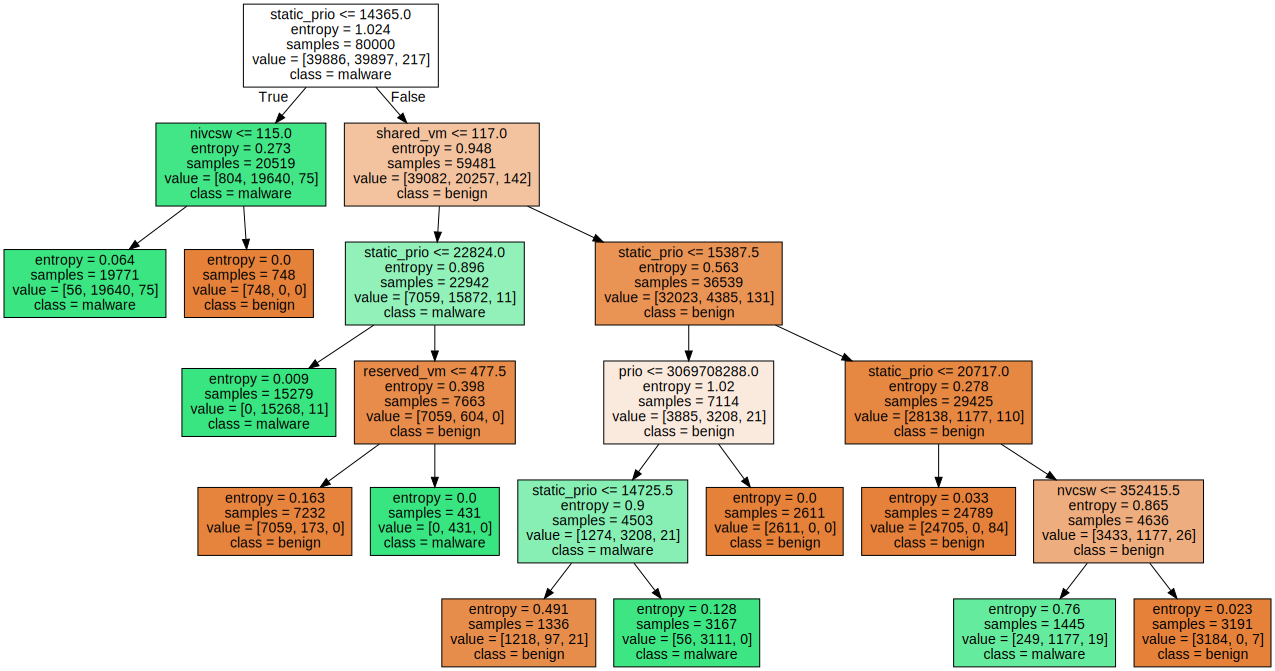

In [24]:
# select the best model
clf = trees[1]

# encode labels
labels = le.inverse_transform([0,1,2])

print('features: ', x.columns.to_list())
print('labels: ', labels)

# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=x.columns.to_list(),  
                                class_names=labels,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
# save graph to MyDecisionTree.png
graph.render("MyDecisionTree")
graph
